# Labora AI: Exploratory Data Analysis?

Análisis exploratorio de datos para el proyecto Labora AI, propuesta para Datatón MTPE 2024 enfocado en desarrollar soluciones tecnológicas para la inclusión laboral de personas con discapacidad.

---

## 1. Librerías

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

---

## 2. Cargar datasets

In [5]:
basePath = 'data/'

dfVacantes = pd.read_csv(f'{basePath}/datasetVacantes.csv', low_memory=False)
dfCompetencias = pd.read_csv(f'{basePath}/datasetCompetencias.csv', low_memory=False)

In [6]:
dfVacantes.head(3)

,ID,NOMBREAVISO,VACANTES,POSTULANTES,IDEMPRESA,UBIGEO,DEPARTAMENTO,PROVINCIA,DISTRITO,FECHAINICIO,FECHAFIN,SINEXPERIENCIA,MODALIDADTRABAJO,TIEMPOEXPERIENCIA,TIPOTIEMPOEXPERIENCIA,SECTOR,ESCO,ESPCD,FECHACREACION,ACTIVO
0,1,TECNICO OPERARIO COSTURA,1,0,81953F501A668484FEDB97808D009768,150101,LIMA,LIMA,LIMA CERCADO,20241004,20241101,NO,NO PRECISA,6,MES(ES),Industrias varias,operador de máquinas de coser/operadora de máq...,NO,20241002,ACTIVO
1,2,Trabajador Agrícola EXCL. PCD,10,1,AD5338826CA2539A5FCFDC8DB0799D79,NaN,NaN,NaN,NaN,20240919,20240929,NO,NO PRECISA,1,AÑO(S),Agricultura/Ganadería,operario agrícola/operaria agrícola,SI,20240919,ACTIVO
2,3,Asistente de Contabilidad- Exclusivo de discap...,1,2,B1C264D2DFF493C1BB3222E2B850E324,200601,PIURA,SULLANA,SULLANA,20231030,20231114,NO,NO PRECISA,1,AÑO(S),Forestal/Papel y Celulosa,auxiliar contable,SI,20231017,ACTIVO


In [18]:
# Código para verificar todos los datos

total_vacantes = len(dfVacantes)
vacantes_pcd = len(dfVacantes[dfVacantes["ESPCD"] == "SI"])
porcentaje_pcd = (vacantes_pcd/total_vacantes)*100

print(f"Total vacantes: {total_vacantes}")
print(f"Vacantes PCD: {vacantes_pcd}")
print(f"Porcentaje PCD: {porcentaje_pcd:.2f}%")

top_dptos = dfVacantes[dfVacantes["ESPCD"] == "SI"]["DEPARTAMENTO"].value_counts()
print("\nTop departamentos PCD:")
for dpto, count in top_dptos.head().items():
   print(f"{dpto}: {count} vacantes")

brecha_libertad = len(dfVacantes.loc[(dfVacantes['DEPARTAMENTO'] == 'LIMA') & (dfVacantes["ESPCD"] == "SI")]) - \
                 len(dfVacantes.loc[(dfVacantes['DEPARTAMENTO'] == 'LA LIBERTAD') & (dfVacantes["ESPCD"] == "SI")])

print(f"\nBrecha Lima-La Libertad: {brecha_libertad}")

Total vacantes: 72582
Vacantes PCD: 14235
Porcentaje PCD: 19.61%

Top departamentos PCD:
LIMA: 2722 vacantes
LA LIBERTAD: 1753 vacantes
ICA: 1075 vacantes
ANCASH: 760 vacantes
AREQUIPA: 720 vacantes

Brecha Lima-La Libertad: 969


In [12]:
dfCompetencias.head(3)

,AVISOID,NOMBRECOMPETENCIA
0,1,coser artículos de tela
1,1,fabricación de ojales
2,1,fabricación de artículos textiles confeccionados


Como se puede mostrar en las tablas de arriba para cada tipo de dataframe es posible notar que para `dfVacantes`, se tiene formatos para modificar como el formato de la fecha, para las columnas `FECHAINICIO` y `FECHAFIN`, además se encontraron datos NaN como en la columna `UBIGEO`, estos pequeños factores deben de modificarse.

---
# 3. Estandarizar formato

In [244]:
def convertDate(dateStr):
    if pd.notna(dateStr):
        return pd.to_datetime(str(int(dateStr)), format='%Y%m%d')
    return pd.NaT

In [246]:
columnsDateToFix = ["FECHAINICIO", "FECHAFIN", "FECHACREACION"]

# handle selected cols format to date
for eachColumn in columnsDateToFix:
    dfVacantes[eachColumn] = dfVacantes[eachColumn].apply(convertDate)

# get duration in minimal format (days)
dfVacantes["DURACION_DIAS"] = (dfVacantes["FECHAFIN"] - dfVacantes["FECHAINICIO"]).dt.days

# handle type of job, change str to number for easiest eda
typeJob = {
    "1": "Remoto",
    "2": "Presencial",
    "3": "Mixto",
}
dfVacantes["MODALIDADTRABAJO"] = dfVacantes["MODALIDADTRABAJO"].map(typeJob)

In [247]:
dfVacantes[["FECHAINICIO", "FECHAFIN", "FECHACREACION", "DURACION_DIAS"]].head()

,FECHAINICIO,FECHAFIN,FECHACREACION,DURACION_DIAS
0,2024-10-04,2024-11-01,2024-10-02,28
1,2024-09-19,2024-09-29,2024-09-19,10
2,2023-10-30,2023-11-14,2023-10-17,15
3,2024-02-29,2024-03-07,2024-02-24,7
4,2024-05-08,2024-05-23,2024-05-07,15


In [250]:
dfVacantes["MODALIDADTRABAJO"].value_counts()

Series([], Name: count, dtype: int64)

---
## 4. Anális de datos

In [253]:
print("\n1. Información general del dataset de vacantes:")
print(f"Total de vacantes: {len(dfVacantes)}")
print(f"Período de datos: {dfVacantes['FECHACREACION'].min()} a {dfVacantes['FECHACREACION'].max()}")


1. Información general del dataset de vacantes:
Total de vacantes: 72582
Período de datos: 2021-07-30 00:00:00 a 2024-10-17 00:00:00


In [255]:
print("\n2. Análisis de vacantes para personas con discapacidad:")
pcd_stats = dfVacantes['ESPCD'].value_counts()
print(pcd_stats)
print(f"\nPorcentaje de vacantes para PCD: {(pcd_stats.get('SI', 0) / len(dfVacantes) * 100):.2f}%")


2. Análisis de vacantes para personas con discapacidad:
ESPCD
NO    58347
SI    14235
Name: count, dtype: int64

Porcentaje de vacantes para PCD: 19.61%


In [257]:
print("\n3. Top 10 departamentos con más vacantes:")
print(dfVacantes['DEPARTAMENTO'].value_counts().head(10))


3. Top 10 departamentos con más vacantes:
DEPARTAMENTO
LIMA           26761
LA LIBERTAD     4016
ICA             2929
AREQUIPA        2610
CALLAO          2090
ANCASH          2087
LAMBAYEQUE      1802
SAN MARTIN      1643
PIURA           1612
CUSCO           1511
Name: count, dtype: int64


In [259]:
print("\n4. Distribución por modalidad de trabajo:")
print(dfVacantes['MODALIDADTRABAJO'].value_counts())


4. Distribución por modalidad de trabajo:
Series([], Name: count, dtype: int64)


In [261]:
print("\n5. Requisitos de experiencia:")
print(dfVacantes['SINEXPERIENCIA'].value_counts())


5. Requisitos de experiencia:
SINEXPERIENCIA
No precisa    39784
NO            28737
SI             4061
Name: count, dtype: int64


In [263]:
print("\n6. Top 10 sectores con más vacantes:")
print(dfVacantes['SECTOR'].value_counts().head(10))


6. Top 10 sectores con más vacantes:
SECTOR
Consultoría en RRHH        6896
Banca/Finanzas/Seguros     5630
Comercial                  5600
Servicios                  5108
Telecomunicaciones         3406
Agricultura/Ganadería      2791
Gobierno                   2510
Educación                  2503
Minería e Hidrocarburos    2478
Industrias varias          2011
Name: count, dtype: int64


In [265]:
print("\n7. Top 10 competencias más solicitadas:")
print(dfCompetencias['NOMBRECOMPETENCIA'].value_counts().head(10))


7. Top 10 competencias más solicitadas:
NOMBRECOMPETENCIA
trabajo en equipo                          5815
practicar la escucha activa                4610
garantizar la satisfacción del cliente     3755
comunicarse por teléfono                   3699
garantizar la orientación al cliente       3173
identificar las necesidades del cliente    3027
comunicarse con los clientes               2807
crear soluciones para problemas            2748
realizar ventas activas                    2705
emitir facturas de venta                   2514
Name: count, dtype: int64


---
## 5. Gráficos descriptivos

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

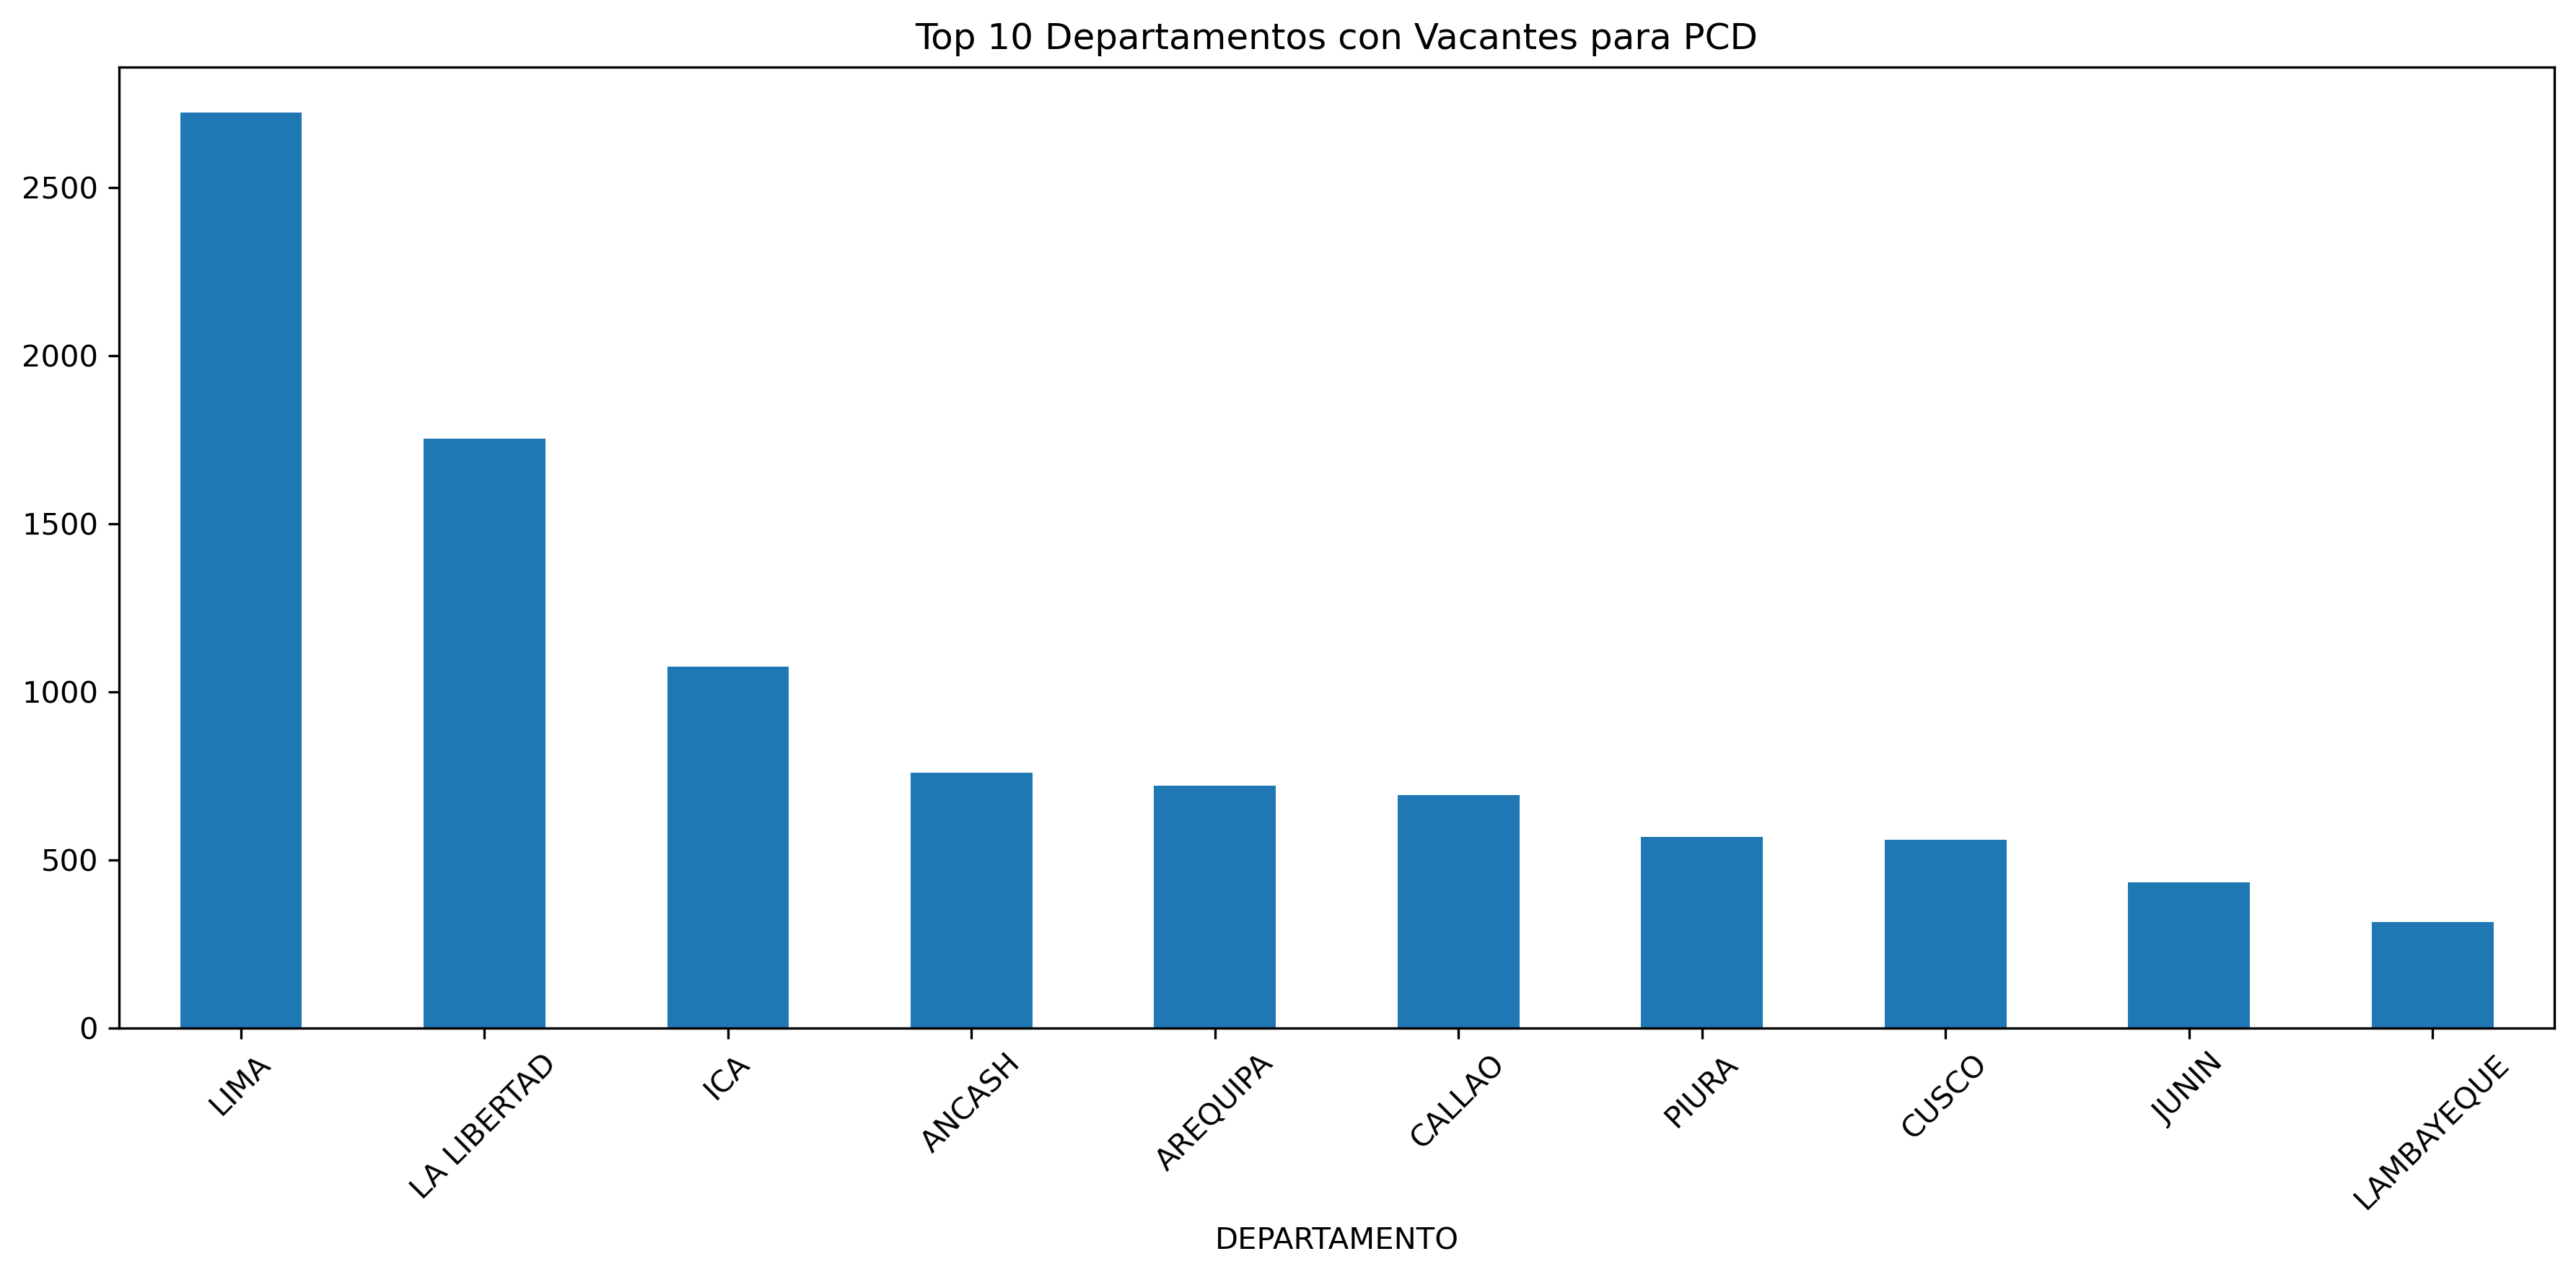

In [276]:
# distribución de vacantes PCD por departamento
plt.figure(figsize=(12, 6))
pcdDept = dfVacantes[dfVacantes['ESPCD'] == 'SI']['DEPARTAMENTO'].value_counts().head(10)
pcdDept.plot(kind='bar')
plt.title('Top 10 Departamentos con Vacantes para PCD')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

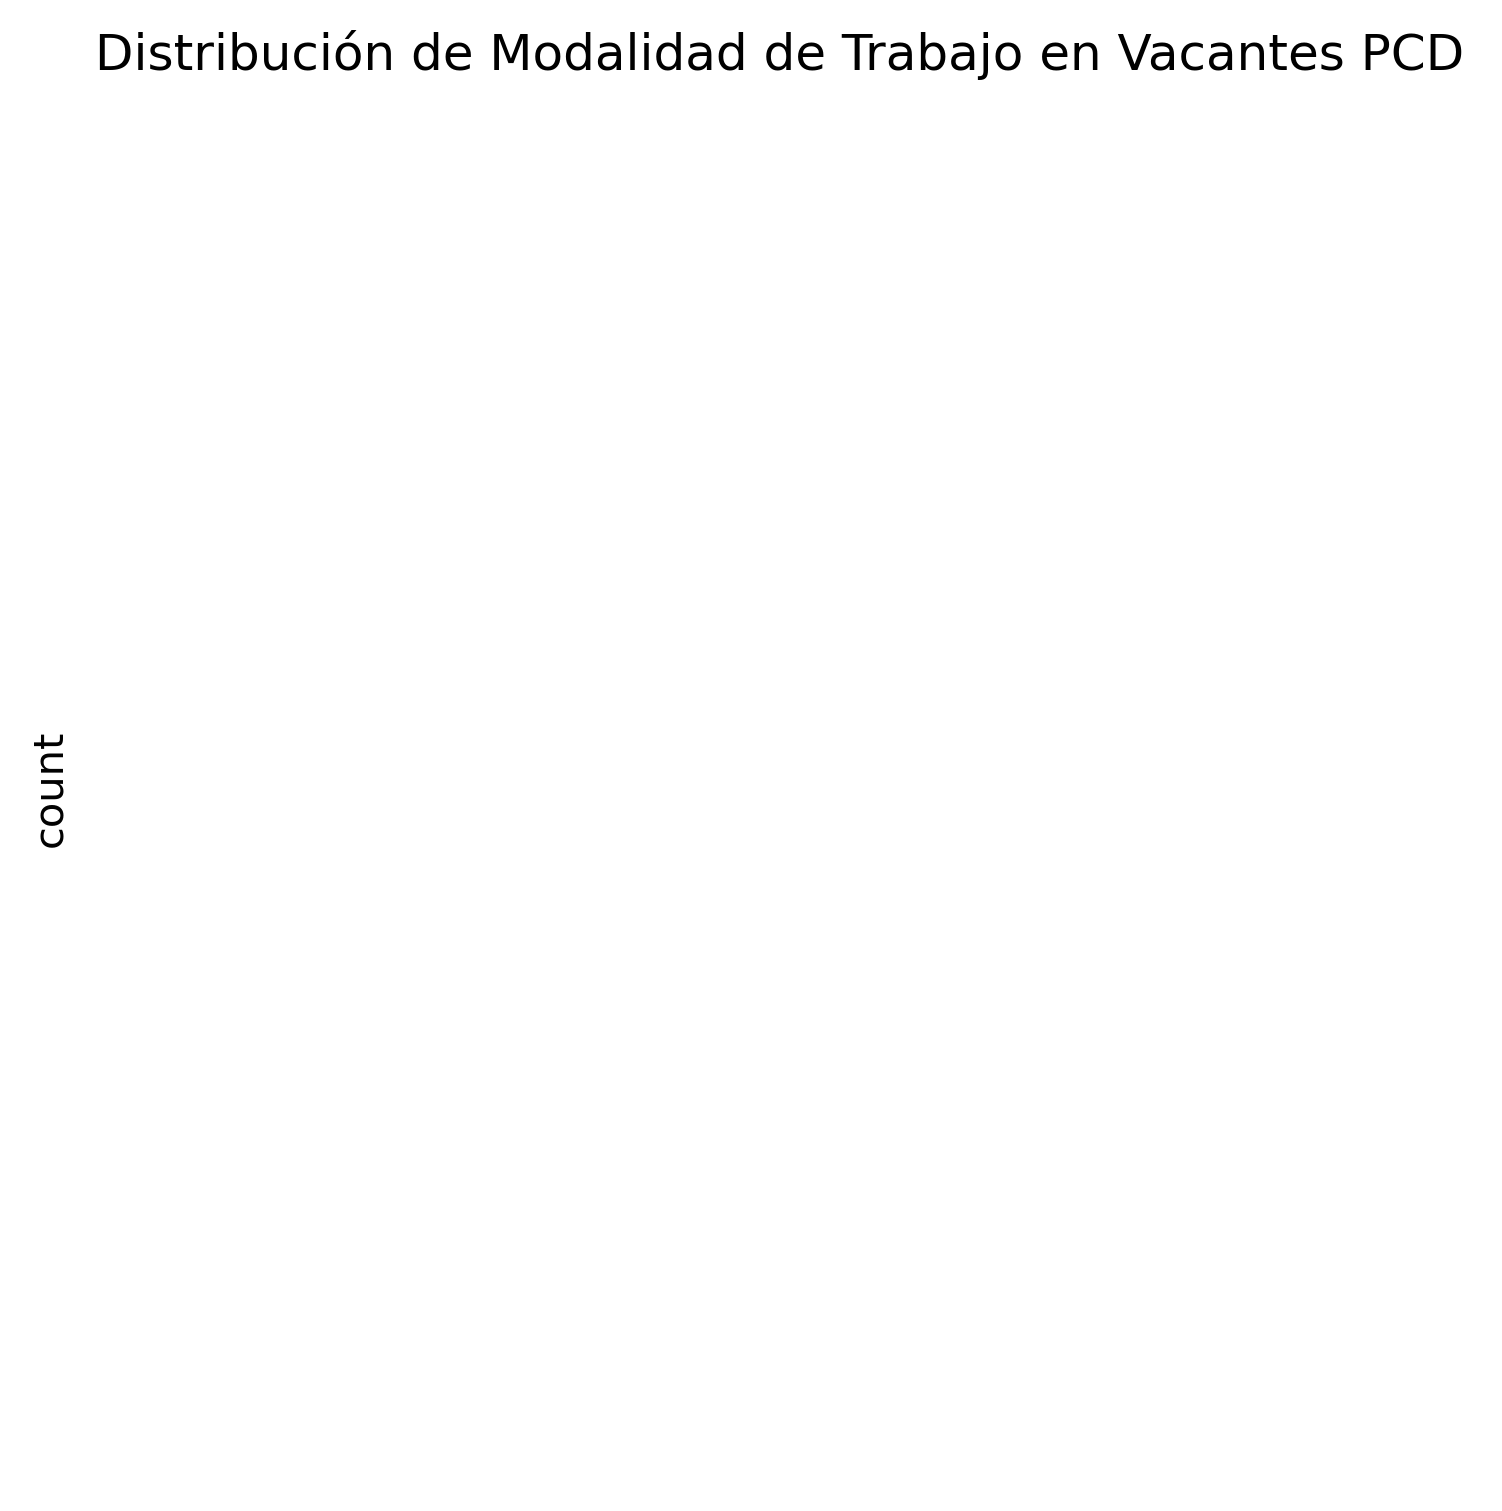

In [278]:
# modalidad de trabajo para PCD
plt.figure(figsize=(8, 6))
dfVacantes[dfVacantes['ESPCD'] == 'SI']['MODALIDADTRABAJO'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribución de Modalidad de Trabajo en Vacantes PCD')
plt.show()

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

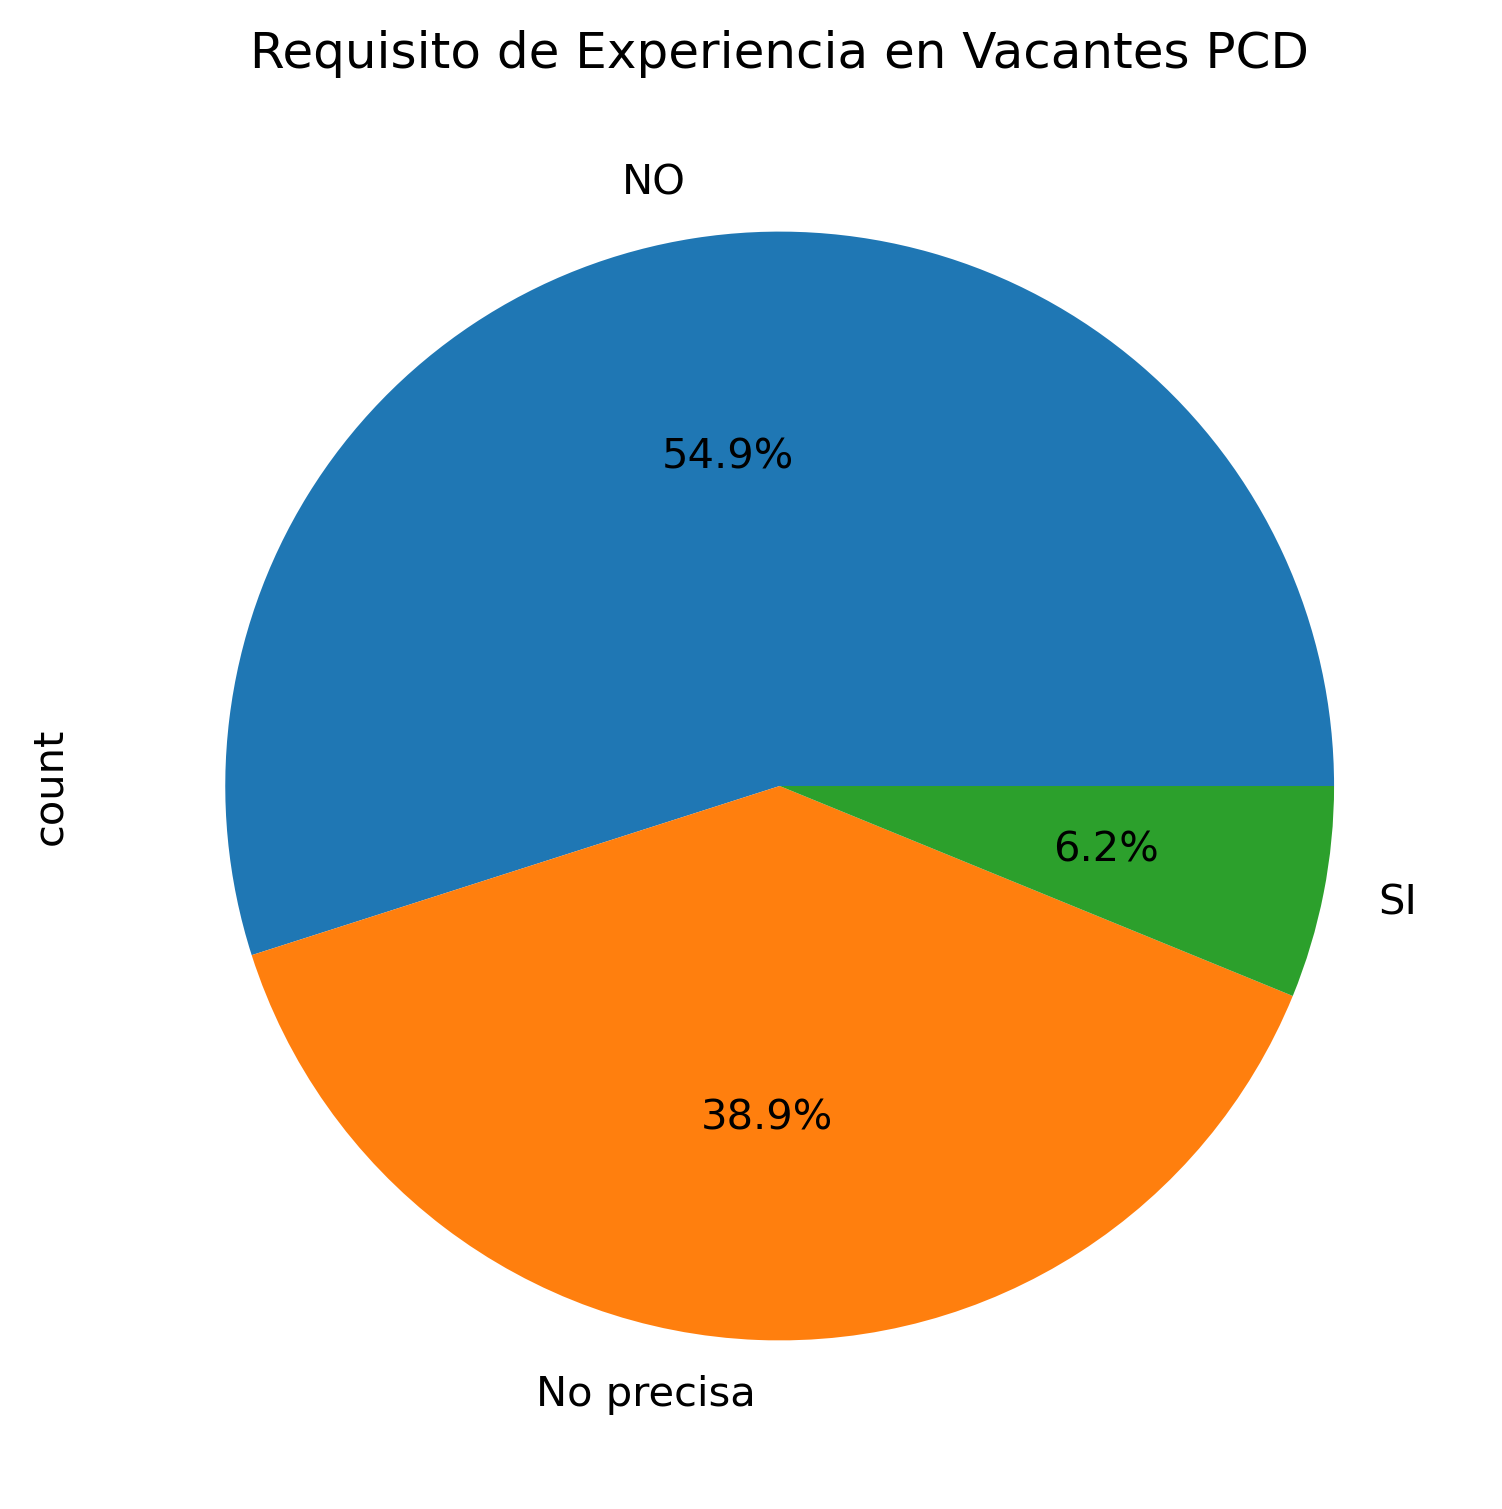

In [280]:
# experiencia requerida para PCD
plt.figure(figsize=(8, 6))
dfVacantes[dfVacantes['ESPCD'] == 'SI']['SINEXPERIENCIA'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Requisito de Experiencia en Vacantes PCD')
plt.show()

---
## 5. Gráfico geopandas

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

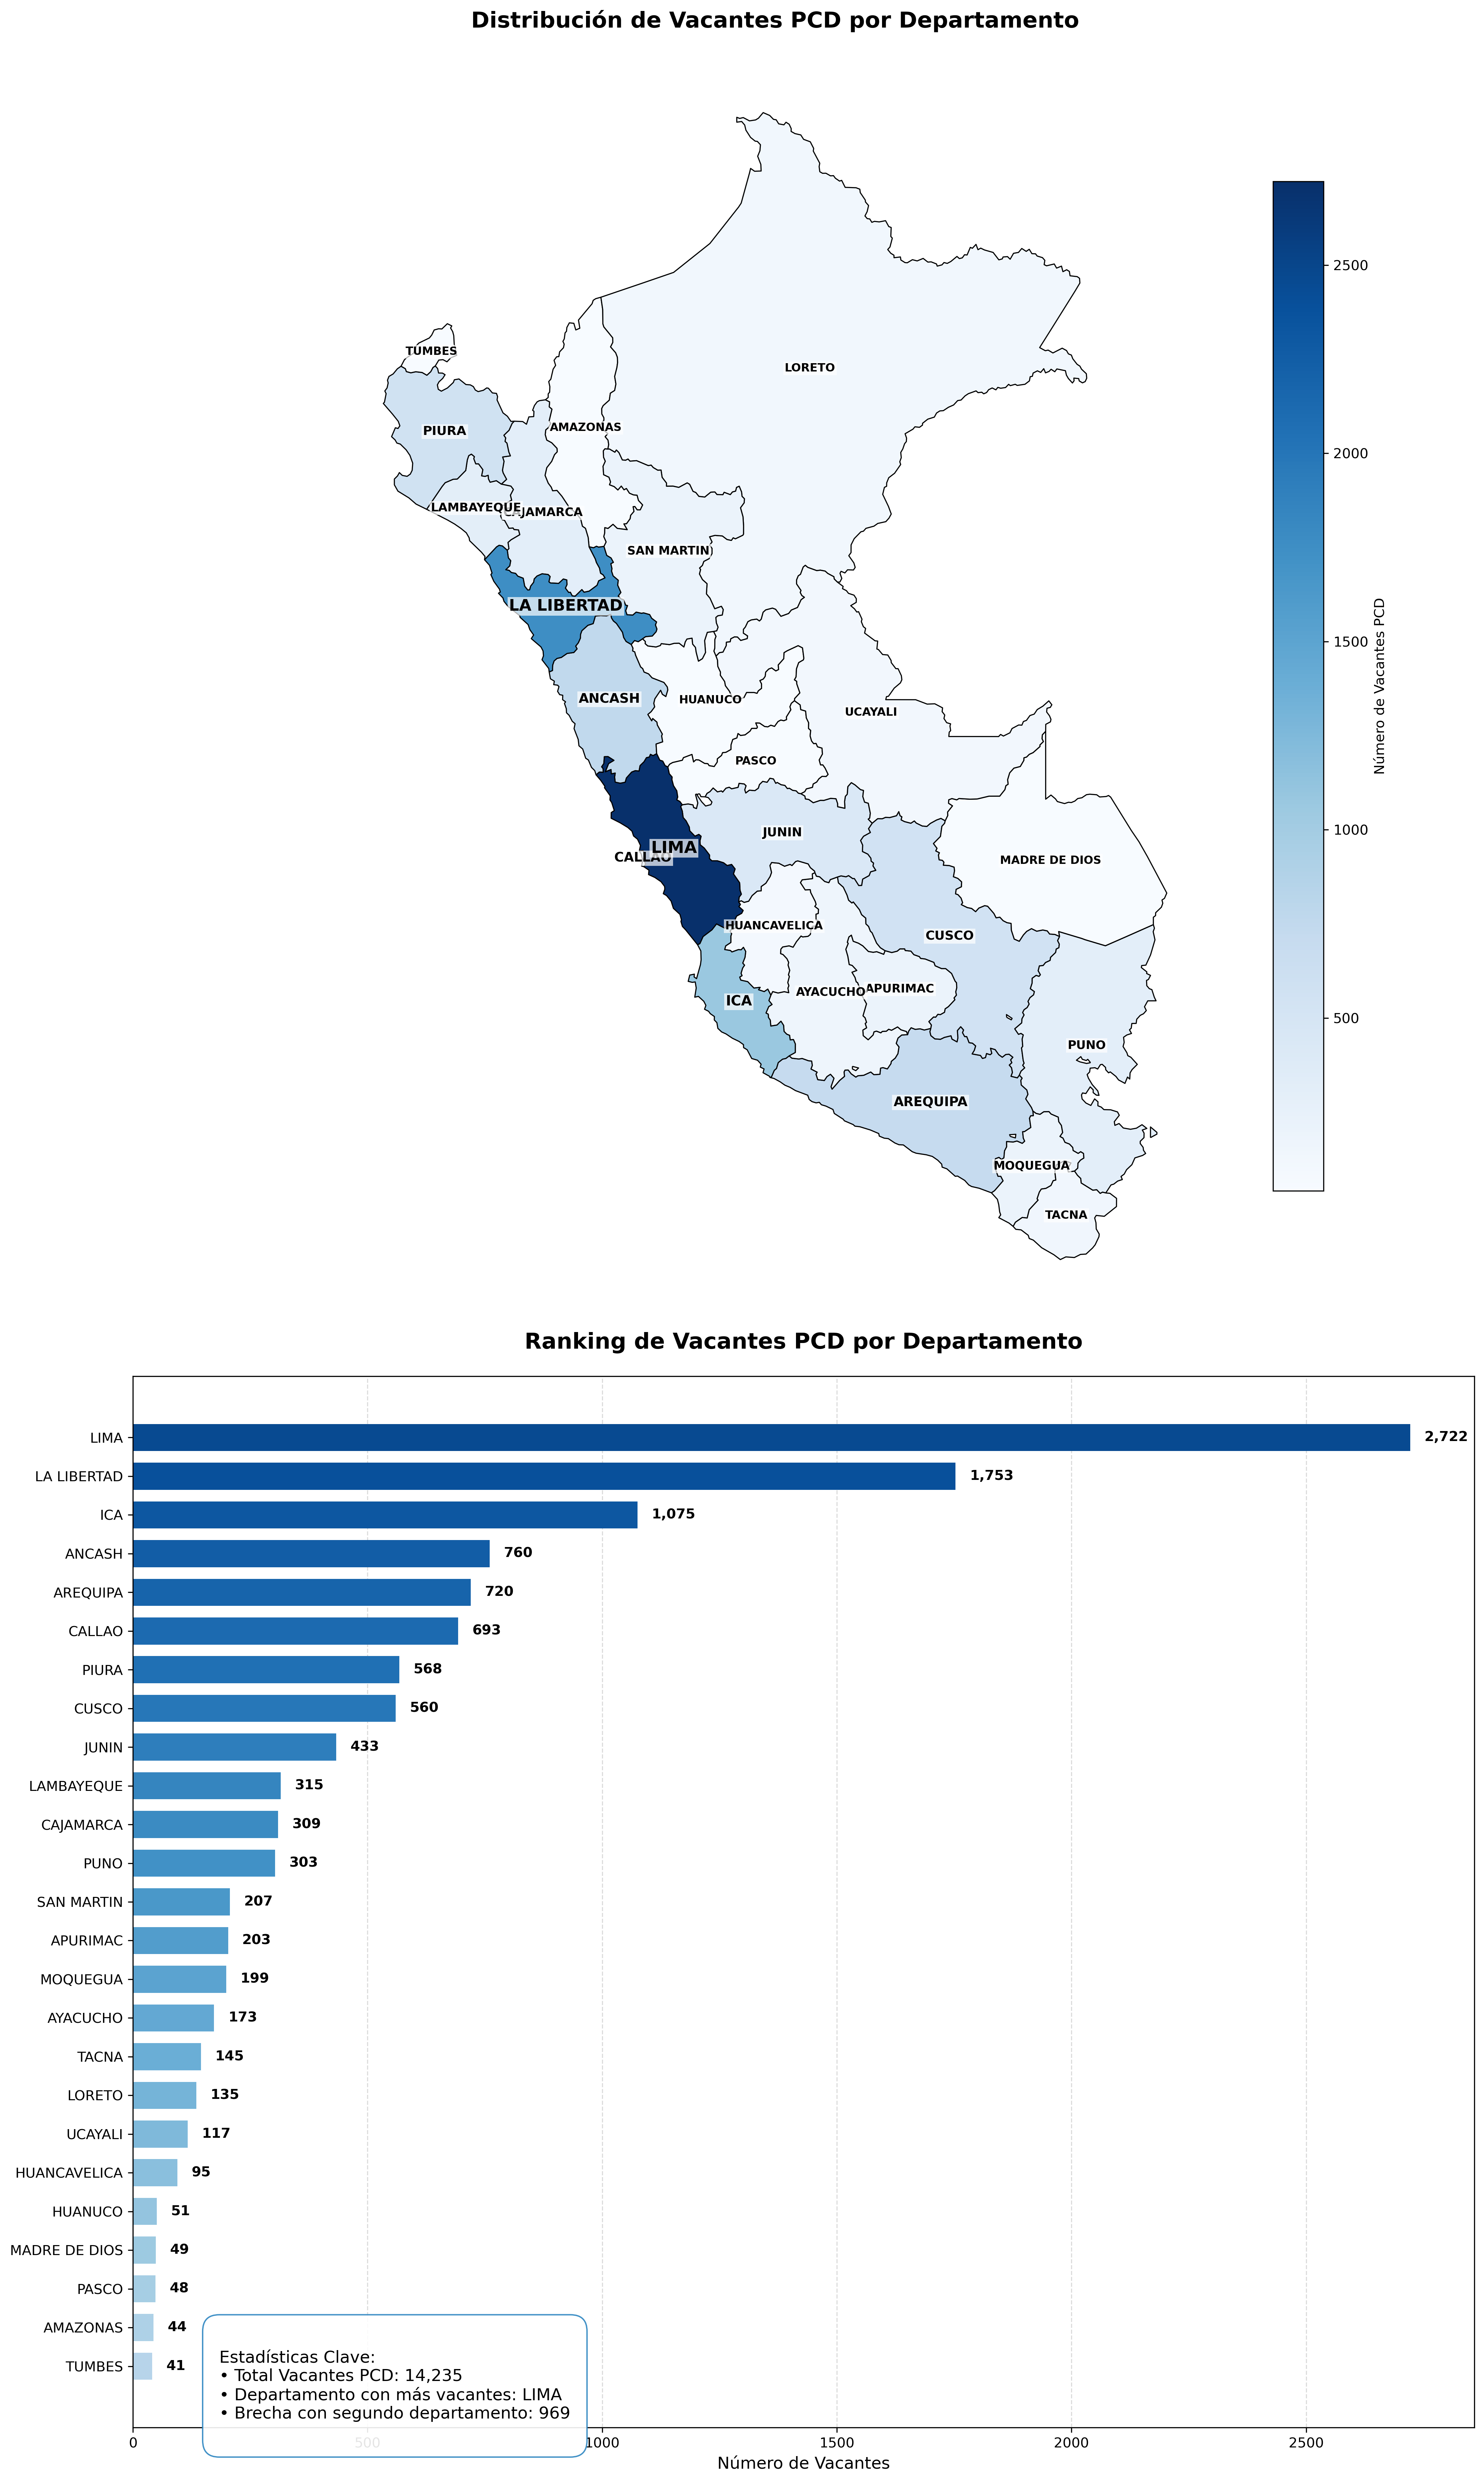


Estadísticas por departamento:
     DEPARTAMENTO  FREQUENCY
0            LIMA       2722
1     LA LIBERTAD       1753
2             ICA       1075
3          ANCASH        760
4        AREQUIPA        720
5          CALLAO        693
6           PIURA        568
7           CUSCO        560
8           JUNIN        433
9      LAMBAYEQUE        315
10      CAJAMARCA        309
11           PUNO        303
12     SAN MARTIN        207
13       APURIMAC        203
14       MOQUEGUA        199
15       AYACUCHO        173
16          TACNA        145
17         LORETO        135
18        UCAYALI        117
19   HUANCAVELICA         95
20        HUANUCO         51
21  MADRE DE DIOS         49
22          PASCO         48
23       AMAZONAS         44
24         TUMBES         41


In [295]:
# Importar librerías necesarias
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Configuración de estilo
plt.rcParams['figure.dpi'] = 300

# Definición de esquema de colores
COLOR_SCHEME = {
    'map_colormap': 'Blues',
    'bars_base': 'Blues',
    'background': 'white',
    'text': 'black',
    'grid': '#CCCCCC',
    'border': 'black',
    'missing': '#F8F9F9',
    'stats_border': '#2E86C1',
    'stats_background': 'white'
}

# Cargar datos de vacantes
df = pd.read_csv(f'{basePath}/datasetVacantes.csv', low_memory=False)

def adjust_departamento(row):
    if row['DEPARTAMENTO'] == 'CALLAO':
        return 'CALLAO'
    elif row['DEPARTAMENTO'] == 'LIMA' and 'CALLAO' in str(row['DISTRITO']).upper():
        return 'CALLAO'
    elif row['DEPARTAMENTO'] == 'LIMA':
        return 'LIMA'
    return row['DEPARTAMENTO']

# Aplicar la corrección
df['DEPARTAMENTO'] = df.apply(adjust_departamento, axis=1)

# Preparar datos de vacantes PCD con la nueva clasificación
df_ESPCD_true = df[df['ESPCD'] == 'SI']
freq_counts = df_ESPCD_true['DEPARTAMENTO'].value_counts().reset_index()
freq_counts.columns = ['DEPARTAMENTO', 'FREQUENCY']

# Asegurar que los nombres de departamentos coincidan
freq_counts['DEPARTAMENTO'] = freq_counts['DEPARTAMENTO'].str.upper()
gdf_peru['NOMBDEP'] = gdf_peru['NOMBDEP'].str.upper() if 'NOMBDEP' in gdf_peru.columns else gdf_peru['nombre'].str.upper()

# Si el shapefile no tiene Callao separado, podemos intentar separarlo
if 'CALLAO' not in gdf_peru['NOMBDEP'].values:
    # Intentar extraer Callao de Lima (esto dependerá de tu shapefile específico)
    callao_geom = gdf_peru[gdf_peru['NOMBDEP'] == 'LIMA'].geometry.iloc[0]
    # Crear una nueva fila para Callao
    callao_row = gdf_peru[gdf_peru['NOMBDEP'] == 'LIMA'].iloc[0].copy()
    callao_row['NOMBDEP'] = 'CALLAO'
    callao_row.geometry = callao_geom
    gdf_peru = pd.concat([gdf_peru, pd.DataFrame([callao_row])])

try:
    # Intenta cargar el shapefile local
    gdf_peru = gpd.read_file('data/departamentosperu.shp')
except:
    # Si falla, usar shapefile alternativo de GitHub
    url = "https://raw.githubusercontent.com/juaneladio/peru-geojson/master/peru_departamental_simple.geojson"
    gdf_peru = gpd.read_file(url)

# Preparar datos de vacantes PCD
df_ESPCD_true = df[df['ESPCD'] == 'SI']
freq_counts = df_ESPCD_true['DEPARTAMENTO'].value_counts().reset_index()
freq_counts.columns = ['DEPARTAMENTO', 'FREQUENCY']

# Asegurar que los nombres de departamentos coincidan
freq_counts['DEPARTAMENTO'] = freq_counts['DEPARTAMENTO'].str.upper()
gdf_peru['NOMBDEP'] = gdf_peru['NOMBDEP'].str.upper() if 'NOMBDEP' in gdf_peru.columns else gdf_peru['nombre'].str.upper()

# Crear figura con dos subplots con mayor tamaño
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 25), height_ratios=[1.2, 1])

# 1. Mapa de calor mejorado
merged = gdf_peru.merge(freq_counts, 
                       left_on='NOMBDEP' if 'NOMBDEP' in gdf_peru.columns else 'nombre', 
                       right_on='DEPARTAMENTO', 
                       how='left')

merged.plot(column='FREQUENCY', 
           ax=ax1,
           legend=True,
           legend_kwds={'label': 'Número de Vacantes PCD',
                       'orientation': 'vertical',
                       'shrink': 0.8},
           cmap=COLOR_SCHEME['map_colormap'],
           missing_kwds={'color': COLOR_SCHEME['missing']},
           edgecolor=COLOR_SCHEME['border'],
           linewidth=0.8)

# Mejorar etiquetas de departamentos
for idx, row in merged.iterrows():
    centroid = row.geometry.centroid
    font_size = 10
    if 'FREQUENCY' in row and pd.notnull(row['FREQUENCY']):
        font_size = min(12, max(8, 8 + row['FREQUENCY']/500))
    
    ax1.annotate(
        text=row['DEPARTAMENTO'] if 'DEPARTAMENTO' in row else row['nombre'],
        xy=(centroid.x, centroid.y),
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=font_size,
        fontweight='bold',
        color=COLOR_SCHEME['text'],
        bbox=dict(facecolor=COLOR_SCHEME['stats_background'], 
                 alpha=0.7, 
                 edgecolor='none', 
                 pad=1)
    )

ax1.set_title('Distribución de Vacantes PCD por Departamento', 
              pad=20, 
              fontsize=16, 
              fontweight='bold')
ax1.axis('off')

# 2. Gráfico de barras mejorado
freq_counts_sorted = freq_counts.sort_values('FREQUENCY')
colors = plt.cm.get_cmap(COLOR_SCHEME['bars_base'])(np.linspace(0.3, 0.9, len(freq_counts_sorted)))
bars = ax2.barh(freq_counts_sorted['DEPARTAMENTO'], 
                freq_counts_sorted['FREQUENCY'],
                color=colors,
                height=0.7)

# Mejorar las etiquetas de las barras


for bar in bars:
    width = bar.get_width()
    ax2.text(width + 30, 
             bar.get_y() + bar.get_height()/2,
             f'{int(width):,}',
             ha='left',
             va='center',
             fontsize=10,
             fontweight='bold')

ax2.set_title('Ranking de Vacantes PCD por Departamento', 
              pad=20, 
              fontsize=16, 
              fontweight='bold')
ax2.set_xlabel('Número de Vacantes', fontsize=12)
ax2.tick_params(axis='both', which='major', labelsize=10)

# Añadir grid y mejorar visualización
ax2.grid(True, axis='x', linestyle='--', alpha=0.7, color=COLOR_SCHEME['grid'])
ax2.set_axisbelow(True)

# Estadísticas clave en un cuadro más visible
stats_text = f"""
Estadísticas Clave:
• Total Vacantes PCD: {len(df_ESPCD_true):,}
• Departamento con más vacantes: {freq_counts.iloc[0]['DEPARTAMENTO']}
• Brecha con segundo departamento: {int(freq_counts.iloc[0]['FREQUENCY'] - freq_counts.iloc[1]['FREQUENCY']):,}
"""

# Añadir cuadro de estadísticas mejorado
plt.figtext(0.15, 0.02, 
            stats_text, 
            fontsize=12,
            bbox=dict(facecolor=COLOR_SCHEME['stats_background'],
                     edgecolor=COLOR_SCHEME['stats_border'],
                     boxstyle='round,pad=1',
                     alpha=0.9))

plt.tight_layout()
plt.savefig('mapa_vacantes_pcd.png', 
            dpi=300, 
            bbox_inches='tight',
            facecolor=COLOR_SCHEME['background'])
plt.show()

# Imprimir estadísticas
print("\nEstadísticas por departamento:")
print(freq_counts.sort_values('FREQUENCY', ascending=False))